In [45]:
import pandas as pd
import numpy as np
import re

import nltk
from textblob import TextBlob
from langdetect import detect

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [46]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud, STOPWORDS

In [47]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.style import set_palette


In [7]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#### Import

In [49]:
#reviews_details_1 = pd.read_csv('./Airbnb/reviews_details_clean.csv')
#reviews_details = pd.read_csv('./Airbnb/reviews_details_eng.csv')
#reviews_details = pd.read_csv('./Airbnb/reviews_details_phrases.csv')
reviews_details = pd.read_csv('./Airbnb/reviews_details_lang.csv')
#english = pd.read_csv('./Airbnb/reviews_details_english_polarity.csv')

In [12]:
reviews_details['date'] = pd.to_datetime(reviews_details['date'])
#reviews_details = reviews_details.drop(columns='Unnamed: 0')

In [13]:
reviews_details.head()

,Unnamed: 0,Unnamed: 0.1,id,date,reviewer_id,comments,district,language
0,0,0,2818,2009-03-30,10952,Daniel is really cool. The place was nice and ...,Amsterdam-Oost,en
1,1,1,2818,2009-04-24,12798,Daniel is the most amazing host! His place is ...,Amsterdam-Oost,en
2,2,2,2818,2009-05-03,11869,We had such a great time in Amsterdam. Daniel ...,Amsterdam-Oost,en
3,3,3,2818,2009-05-18,14064,Very professional operation. Room is very clea...,Amsterdam-Oost,en
4,4,4,2818,2009-05-25,17977,Daniel is highly recommended. He provided all...,Amsterdam-Oost,en


In [6]:
reviews_details.dtypes

id                      int64
date           datetime64[ns]
reviewer_id             int64
comments               object
district               object
polarity              float64
eng                      bool
phrases                object
dtype: object

In [7]:
reviews_details.shape

(431830, 8)

In [8]:
reviews_details['comments'] = reviews_details['comments'].astype(str)

In [10]:
#reviews_details_1['comments'] = reviews_details_1['comments'].astype(str)

In [48]:
english.loc[english.polarity==0]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,reviewer_id,comments,district,language,polarity
61,61,61,61,2818,2013-02-28,5253122,The reservation was canceled 29 days before ar...,Amsterdam-Oost,en,0.0
188,229,229,229,2818,2018-05-25,24554860,This will be your favourite Airbnb in Amsterdam,Amsterdam-Oost,en,0.0
230,281,281,281,3209,2017-11-26,136967264,The host canceled this reservation 11 days bef...,Amsterdam-West,en,0.0
241,295,295,295,20168,2014-09-09,14129314,The reservation was canceled 52 days before ar...,Amsterdam-Centrum,en,0.0
242,296,296,296,20168,2014-09-17,4225980,The reservation was canceled 58 days before ar...,Amsterdam-Centrum,en,0.0
364,434,434,434,20168,2017-02-01,20366957,The host canceled this reservation 36 days bef...,Amsterdam-Centrum,en,0.0
511,613,613,613,27886,2017-04-17,124344645,Terrific house boat..,Amsterdam-Centrum,en,0.0
847,1030,1030,1030,28658,2017-05-01,35830249,"The place was great,near the tram stop and clo...",Amsterdam-West,en,0.0
981,1220,1220,1220,28871,2017-08-29,144697534,The host canceled this reservation 23 days bef...,Amsterdam-Centrum,en,0.0
993,1239,1239,1239,28871,2017-11-12,89915427,TODOS IRÃO ADORAR ESSA EXPERIÊNCIA.,Amsterdam-Centrum,en,0.0


#### Language

In [11]:
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [14]:
#reviews_details_1['language'] = reviews_details_1['comments'].apply(language_detection)

In [17]:
reviews_details_1.to_csv('reviews_details_lang.csv')

In [22]:
eng = reviews_details.loc[reviews_details.language=='en']

In [23]:
eng.shape

(347368, 8)

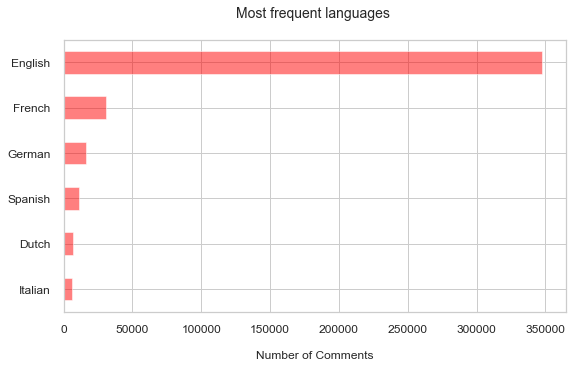

In [24]:
ax = reviews_details.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="r", 
                                             fontsize=12, facecolor='red', alpha=0.5)
ax.set_title('Most frequent languages \n', fontsize=14)
ax.set_xlabel("\nNumber of Comments\n")
ax.set_yticklabels(['English', 'French', 'German', 'Spanish', 'Dutch', 'Italian'])
ax.invert_yaxis()

#### Polarity

In [14]:
eng = reviews_details.loc[reviews_details.language=='en']
eng.shape

(347368, 8)

In [15]:
#eng['polarity'] = eng['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
#eng.to_csv('reviews_details_english_polarity.csv')

In [ ]:
reviews_details = reviews_details.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [17]:
eng.head()

,id,date,reviewer_id,comments,district,language,polarity
0,2818,2009-03-30,10952,Daniel is really cool. The place was nice and ...,Amsterdam-Oost,en,0.140741
1,2818,2009-04-24,12798,Daniel is the most amazing host! His place is ...,Amsterdam-Oost,en,0.365278
2,2818,2009-05-03,11869,We had such a great time in Amsterdam. Daniel ...,Amsterdam-Oost,en,0.313681
3,2818,2009-05-18,14064,Very professional operation. Room is very clea...,Amsterdam-Oost,en,0.451111
4,2818,2009-05-25,17977,Daniel is highly recommended. He provided all...,Amsterdam-Oost,en,0.222778


In [ ]:
#reviews_details['polarity'] = reviews_details['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [14]:
#reviews_details.to_csv('reviews_details_pol.csv')

In [6]:
reviews_details['polarity'].describe()

count    293034.000000
mean          0.418807
std           0.198800
min          -1.000000
25%           0.299331
50%           0.403333
75%           0.525000
max           1.000000
Name: polarity, dtype: float64

#### Polarity samples

In [76]:
highest = eng.loc[eng.polarity == 1, ['comments']].sample(5).values
for h in highest:
    for i in h:
        print(i)

My stay was great!
Perfect apartment in a perfect location. And jitske is the nicest host ever. 
Awesome houseboat with a great location!
Great experience! Consigliato!
Had a great stay! Everything was as described und Maikel was the perfekt host. I'd definetely recommend this apartment.


In [99]:
neutral = eng.loc[eng.polarity < -0.6, ['comments']].sample(5).values
for n in neutral:
    for i in n:
        print(i)
    

Worst experience ever due to bad wifi that host promised to fix but never did. Add a rodent running around the kitchen and late night bar noise ... and we were very disappointed 
It’s so bad home
Terrible experience. I would recommend AirBnB to shut down this place for hygienic and health issues. Very dirty place, toilette not functional, stinky sheet and freezing. Environment. We run away after one night even if we booked for two nights. Stay away!
The place is in disrepair and very dirty.
Her behavior was terrible. no polite. and the house inside the dirt.


In [89]:
eng.groupby('district')['comments'].count()

district
Amsterdam Nieuw-West     15444
Amsterdam-Centrum       105258
Amsterdam-Noord          18542
Amsterdam-Oost           44478
Amsterdam-West           95521
Amsterdam-Zuid           62424
Amsterdam-Zuidoost        5701
Name: comments, dtype: int64

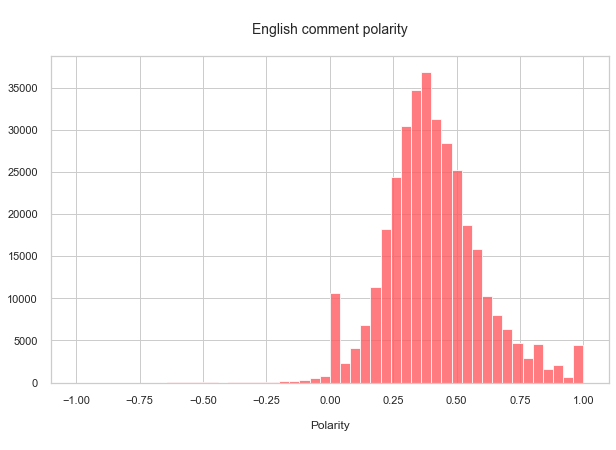

In [30]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(english.polarity, num_bins, facecolor='#FF5A5F', alpha=0.8)
plt.xlabel('\nPolarity\n')
plt.ylabel('')
plt.title('\nEnglish comment polarity\n', fontsize=14)
plt.show();

In [30]:
stopwords = set(stopwords.words('english'))
stopwords.update(['airbnb', "thank", 'thanks', 'amsterdam', 'great', 'place', 'us', 'recommend', 'nice', 'apartment', 'appartment', 'house', 'stay', 'also', 'host', 'house', 'wonderful', 'lovely', 'amazing', 'perfect', 'would', 'excellent', 'time'])

In [11]:
top = english.loc[english['polarity']>0.5]
top_com = top['comments'].tolist()

In [16]:
reviews_details[(reviews_details['date'].dt.year==2018)].head()
centrum = reviews_details[(reviews_details['district']=='Amsterdam-Centrum')]
oost = reviews_details[(reviews_details['district']=='Amsterdam-Oost')]

Text(0.5, 1.0, 'Reviews per Year\n')

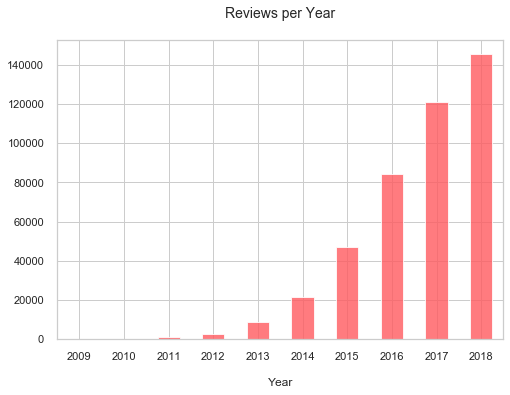

In [15]:
# Reviews per year
reviews_details.date.dt.year.value_counts().sort_index().plot.bar(facecolor='#FF5A5F', alpha=0.8)
plt.xticks(rotation='horizontal')
plt.xlabel('\nYear')
plt.title('Reviews per Year\n',fontsize=14)

Text(0.5, 1.0, 'Reviews per Month\n')

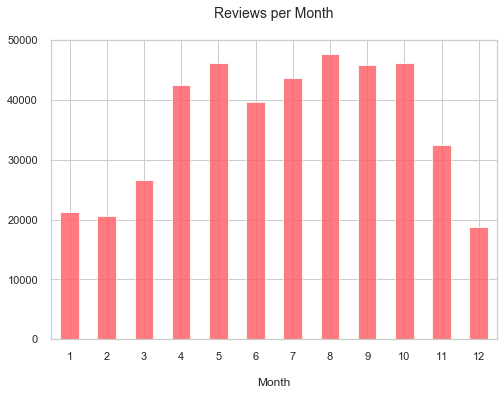

In [16]:
# Reviews per month
reviews_details.date.dt.month.value_counts().sort_index().plot.bar(title='Reviews per Month\n', facecolor='#FF5A5F', alpha=0.8)
plt.xticks(rotation='horizontal')
plt.xlabel('\nMonth')
plt.title('Reviews per Month\n', fontsize=14)

In [19]:
reviews_details.shape

(293034, 7)

In [538]:
#reviews_details_eng.to_csv('reviews_details_eng.csv')

## Average polarity per apartment

In [12]:
pol_ap = pd.DataFrame(english.groupby('id')['polarity'].mean().reset_index())

In [16]:
#pol_ap.to_csv('pol_ap.csv')

In [31]:
english.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,reviewer_id,comments,district,language,polarity
0,0,0,0,2818,2009-03-30,10952,Daniel is really cool. The place was nice and ...,Amsterdam-Oost,en,0.140741
1,1,1,1,2818,2009-04-24,12798,Daniel is the most amazing host! His place is ...,Amsterdam-Oost,en,0.365278
2,2,2,2,2818,2009-05-03,11869,We had such a great time in Amsterdam. Daniel ...,Amsterdam-Oost,en,0.313681
3,3,3,3,2818,2009-05-18,14064,Very professional operation. Room is very clea...,Amsterdam-Oost,en,0.451111
4,4,4,4,2818,2009-05-25,17977,Daniel is highly recommended. He provided all...,Amsterdam-Oost,en,0.222778


# Wordclouds

In [ ]:
#?WordCloud

In [39]:
from nltk.corpus import stopwords
#stop = set(stopwords.words('english'))

In [40]:
top = english.loc[english['polarity']>0.5]
top.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,reviewer_id,comments,district,language,polarity
14,14,14,14,2818,2010-04-16,97200,"It's the perfect place: clean, safe, noiseless...",Amsterdam-Oost,en,0.577778
20,20,20,20,2818,2010-06-19,97097,Daniel's place was great! We got so much relax...,Amsterdam-Oost,en,0.650000
31,31,31,31,2818,2010-10-08,224147,Daniel's place was without a doubt the most re...,Amsterdam-Oost,en,0.581250
33,33,33,33,2818,2010-10-25,241053,"Staying st Daniel's was flawless, everything w...",Amsterdam-Oost,en,0.566111
45,45,45,45,2818,2011-07-08,400176,Daniel is a phenomenal host; he has everything...,Amsterdam-Oost,en,0.538889


In [41]:
text = " ".join(review for review in top.comments)
text = text.lower()

In [42]:
stopwords = set(stopwords.words('english'))
stopwords.update(['airbnb', "thank", 'thanks', 'amsterdam', 'time','really', 'room','even','home', 'host','great', 'place', 'us', 'recommend', 'nice', 'apartment', 'appartment', 'house', 'stay', 'also', 'host', 'house', 'wonderful', 'lovely', 'amazing', 'perfect', 'would', 'excellent', 'time'])

In [43]:
wordcloud = WordCloud(stopwords=stopwords, max_words=50, width=3000, height=2000, 
                      background_color="white", colormap='Reds').generate(text)

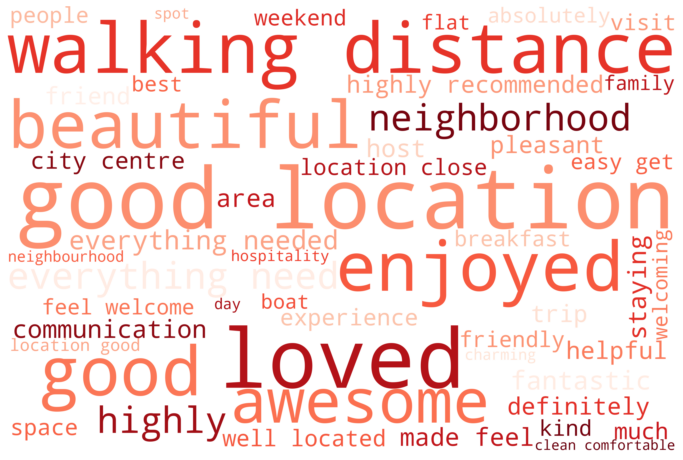

In [44]:
plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("wordcloud_top.png")

In [37]:
low = english.loc[english['polarity'] < -0.5]
low.shape

(47, 10)

In [38]:
text_low = " ".join(review for review in low.comments)
text_low = text_low.lower()

In [42]:
stopwords = set(STOPWORDS)
stopwords.update(['airbnb', "thank", 'thanks', 'amsterdam', 'great', 'really', 'room','place', 'us', 'recommend', 'apartment', 'appartment', 'stay', 'also', 'host', 'house', 'time'])

In [45]:
wordcloud_low = WordCloud(stopwords=stopwords, max_words=50, background_color="white", colormap='Reds',
                          width=3000, height=2000).generate(text_low)

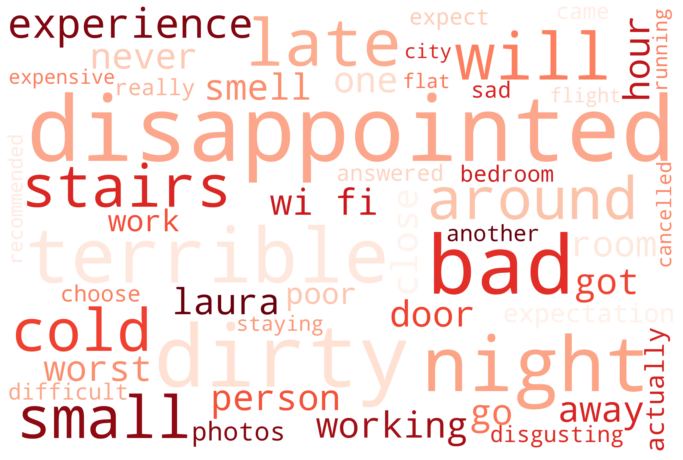

In [46]:
plt.figure(figsize=[12,10])
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud_low.to_file("wordcloud_low.png")

In [9]:
"""
def get_phrases(df, column):
    lst = df[column].tolist()

    lst2 = []
    lst3 = []

    for i in lst:
        a = i.replace('[','')
        b = a.replace(']','')
        c = b.replace("'",'')
        d = c.split(',')
        lst2.append(d)

    for z in lst2:
        for zz in z:
            lst3.append(zz)

    return lst3
"""